# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
#

In [ ]:
# read the data
data = pd.read_csv('foodhub_order.csv')
df = data.copy()

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [ ]:
df.duplicated().sum()

0

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:


# There are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:




*   There are 5 numerical columns in the dataset and 4 object type columns.
*   The rating column is an object type column , it should be converted to a numerical column.



In [ ]:
df['rating'].unique()

array([nan,  5.,  3.,  4.])



*   We can see that there are mixed values in the column, there are some values which are numbers and some values are 'Not given'.
*   We need to convert the 'Not Given' values into nan, for the column to be a Float type



In [ ]:
df['rating']=df['rating'].replace(['Not given']),np.nan

In [ ]:
# changing the data type to float
df['rating'] = df['rating'].astype(float)

In [ ]:
# let's check the data type of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB




*  Now the rating column has been fixed and it is type float.
* Now there are four columns which are type int, two columns which are type float and three columns which are type object.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()


order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:





*   There are 736 nan values in the column Rating.




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


The minimum time taken for food preparation is 20 min, average time is  27.37 minutes and the maximum time is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:

df.isna().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:


There are 736 entries where the orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# Observations on the Order id

In [ ]:
df['order_id'].nunique()

1898



*   There are 1898 unique orders




# Observations on Customer id

In [ ]:
df['customer_id'].nunique()

1200



*   There are 1200 customers in this dataset




# Observations on Restaurant name

In [ ]:
df['restaurant_name'].nunique()

178



*   There are 178 restaurants in this dataset.




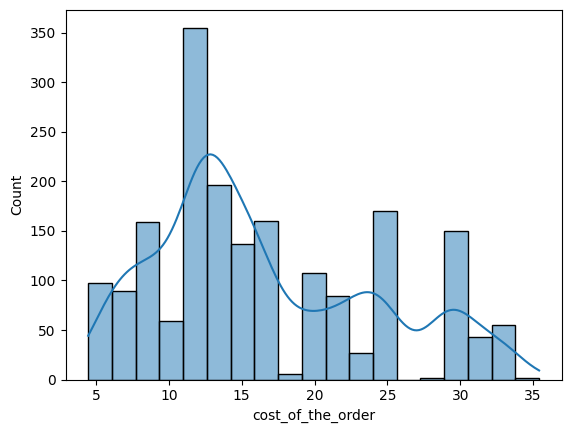

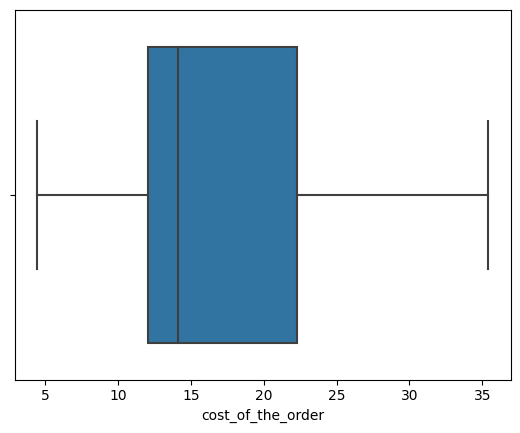

In [ ]:
#Observations on the 'cost of order'
sns.histplot(data=df,x='cost_of_the_order',kde='True')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()






*   Almost 75% of the orders are in the range of 14 dollars to 22 dollars.
*  The highest no. of orders are in the range of 11 dollars to 13 dollars.
*   The distribution is slightly right skewed.









# Observation on Food preparation time




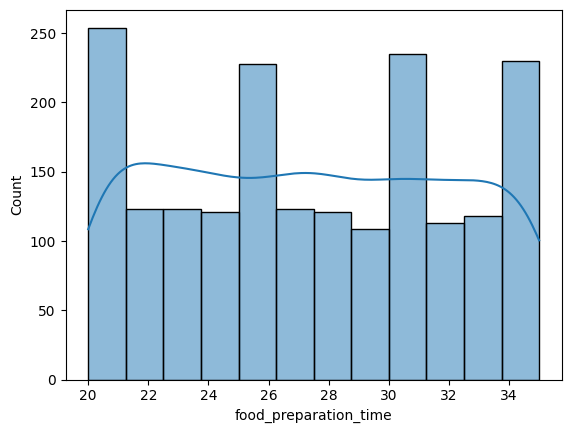

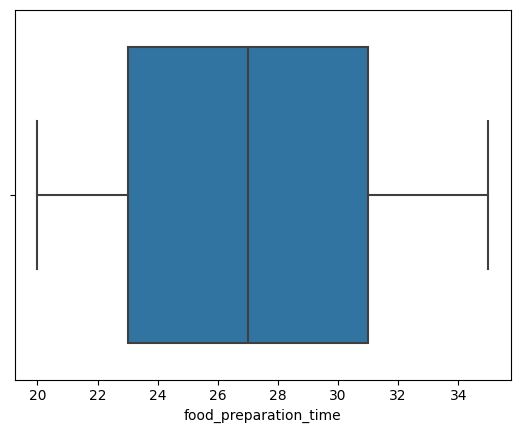

In [ ]:
sns.histplot(data=df,x='food_preparation_time',kde='True')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()




*  This plot has normal distribution.
*  There are no outliers in this distribution.
*   On an average it takes around 27 minutes for food preparation.








# Observations on Time taken for delivery



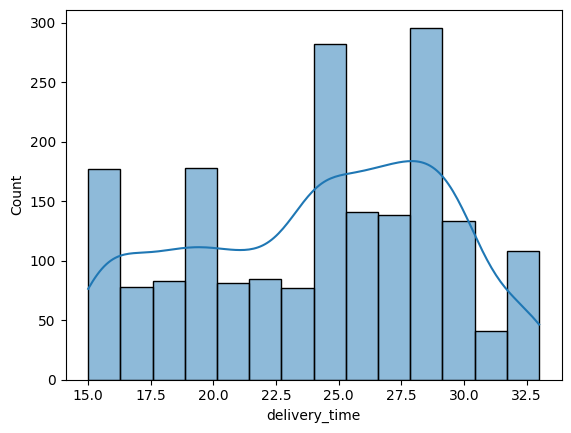

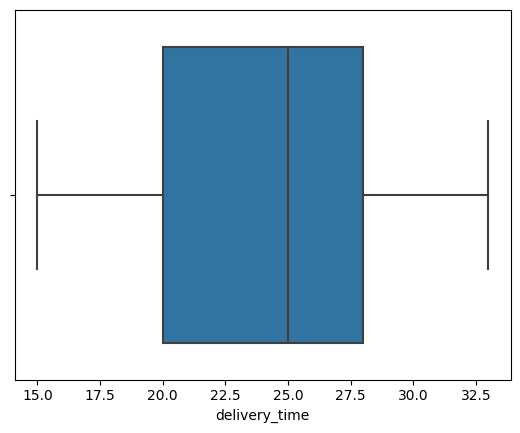

In [ ]:
sns.histplot(data=df,x='delivery_time',kde='True')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()



*  There are no outliers in this distribution.
*  This plot is left skewed.
*   On an average it takes 25minutes for Food delivery






# Observation on Rating

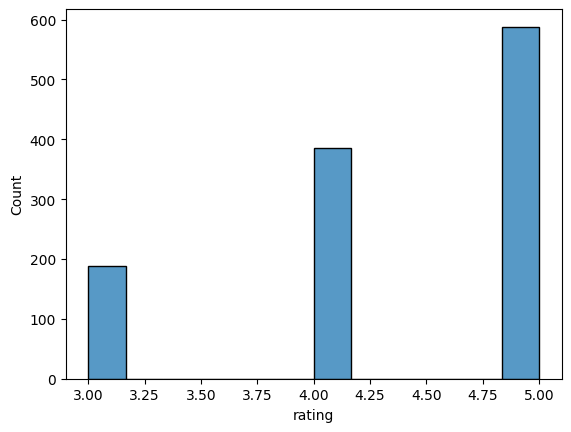

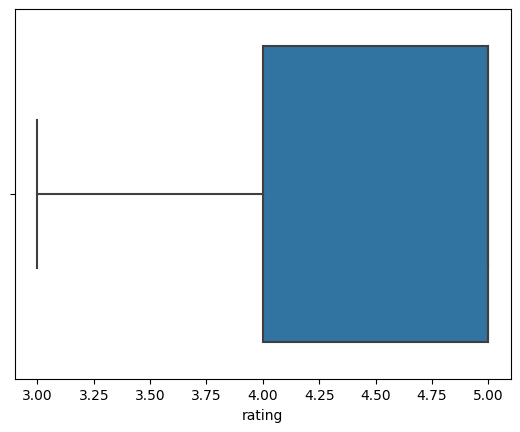

In [ ]:
sns.histplot(data=df,x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()



*   As alomst 743 entries in the data are nan, their rating is not considered.
*   Most of the available ratings are on the higher side that is 5.
*  The  boxlot is left skewed with no whisker to the right.






#Observation on Day of the week

<Axes: xlabel='day_of_the_week', ylabel='count'>

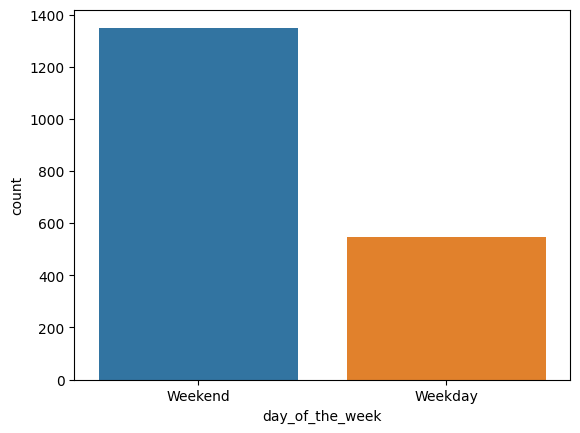

In [ ]:
sns.countplot(data=df,x='day_of_the_week')



*  As we can see majority of the orders are on the weekend.









# Observations on cuisine_type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

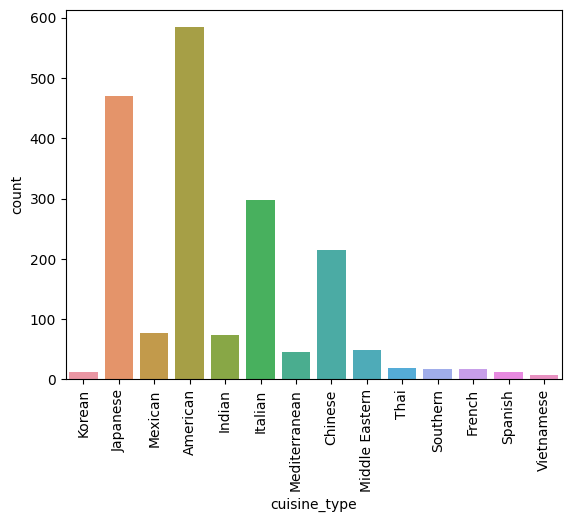

In [ ]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)



*  As we can see there are 14 cuisine types.
*  The most ordered cuisine type is American followed by Japanese and Italian.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df1=df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by='order_id',axis=0,ascending=False)
df1.head()

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

*  As we can see the topmost restaurant is Shake shack  followed by the Meatball shop , Blue Ribbon Sushi , Blue Ribbon Fried Chicken and the fifth one is Parm





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

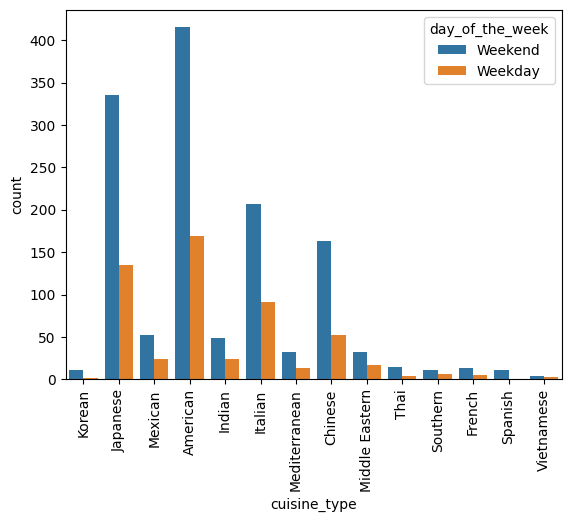

In [ ]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)

#### Observations: As we can see from the above plot, American cuisine is the most popular cuisine on the weekend.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
c= df.loc[df['cost_of_the_order']>20].count()
c


order_id                 555
customer_id              555
restaurant_name          555
cuisine_type             555
cost_of_the_order        555
day_of_the_week          555
rating                   356
food_preparation_time    555
delivery_time            555
dtype: int64

In [ ]:
#T will be the total no. of entries
df['cost_of_the_order'].count()

1898

In [ ]:
# The number of orders above 20 dollars in 555 and the total no. of orders is 1898
print('The percentage of the orders cost more than 20 dollars is', 555/1898*100)


The percentage of the orders cost more than 20 dollars is 29.24130663856691


#### Observations:The percentage of the orders cost more than 20 dollars is 29.24 percent


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df2=df[['customer_id','order_id']].groupby('customer_id').count().sort_values(by='order_id',axis=0,ascending=False)
df2.head()

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7


#### Observations:

*   The customer with id 52832 has the most no. of orders i.e 13 followed by customer id 47440 with 10 orders and the third customer id is 83287 with 9 orders.






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# Observations on the Numeric variables

<ipython-input-30-b547eaa8dce0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


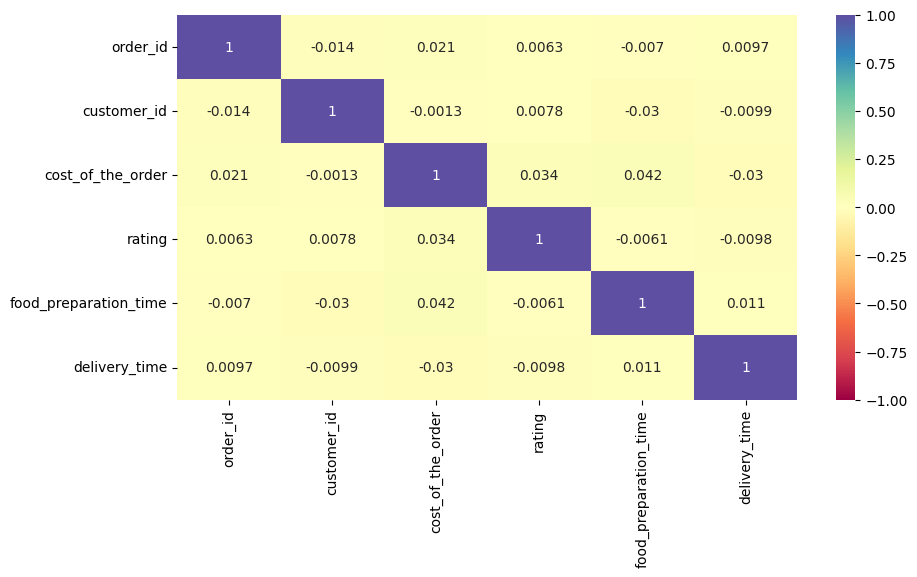

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()



*   The heatmap shows a weak relation between the numerical variables.




# Observations on the cuisine type and cost of the order.

<Axes: xlabel='cost_of_the_order', ylabel='cuisine_type'>

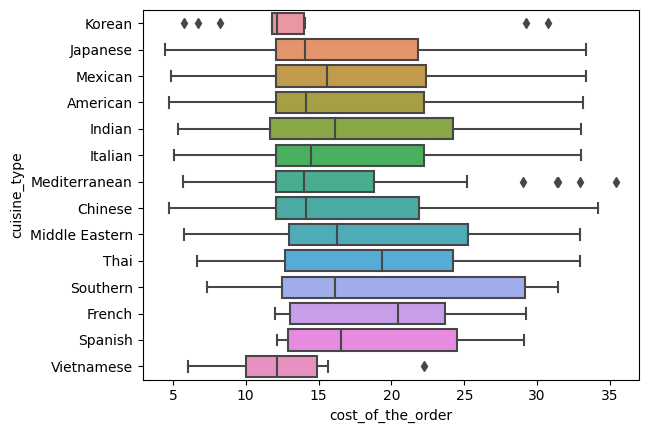

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')




*  The Korean, Mediterranean and Vietnamese cuisine have outliers in them.
*  The Chinese and Mediterranean cuisines have the highest cost of order.



# Observations on cuisine type and day of the week.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

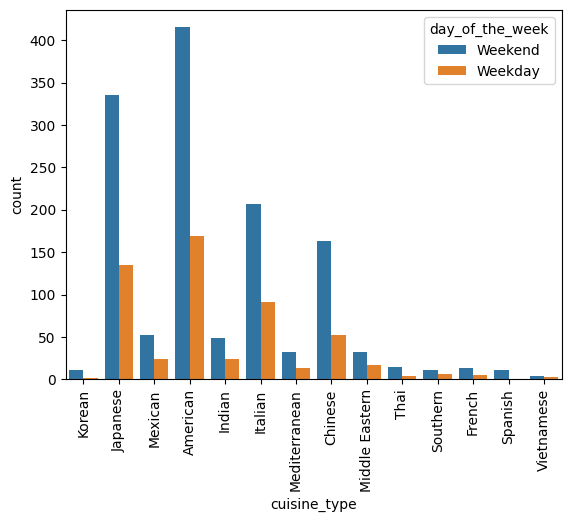

In [ ]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)



*   As we can see the no. of orders on the weekend exceeds the no. of orders on the weekdays.
*   The most popular cuisine on the weekend and weekday is American followed by Japanese and Italian respectively.



# Observations on Cuisine type and Rating


<Axes: xlabel='rating', ylabel='cuisine_type'>

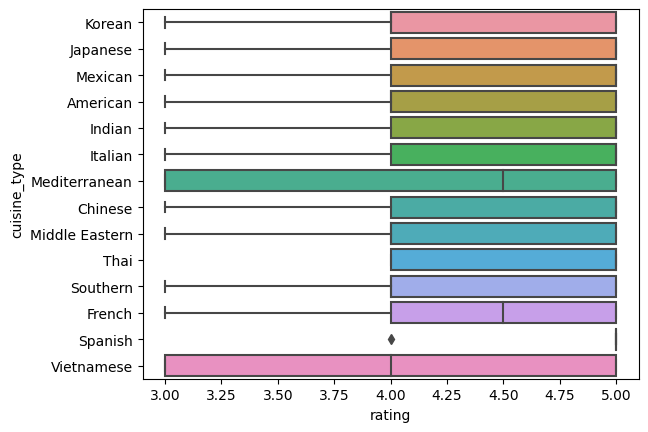

In [ ]:
sns.boxplot(data= df,x='rating',y='cuisine_type')



*   Most of the cuisines except Mediterranean, Spanish and Vietnamese have ratings which are on the higher side.




# Observations on Cuisine type and food preparation time

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

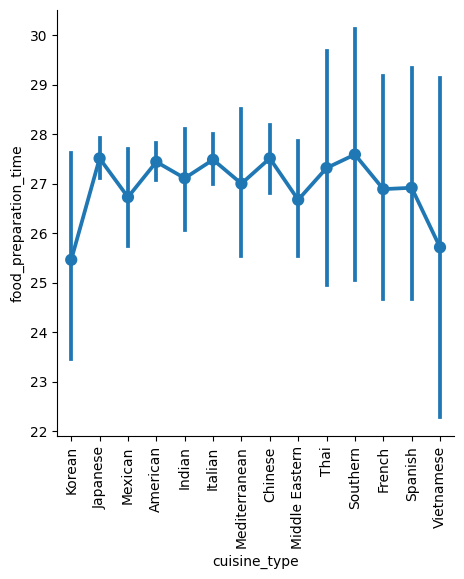

In [ ]:
sns.catplot(data= df,x='cuisine_type',y='food_preparation_time',kind='point')
plt.xticks(rotation=90)



*  The average time for food preparation for all cuisines is under 28 minutes.
*  Southern cuisine takes the most time for preparation, more than 30 minutes.



# Observation on the cost of the order and day of the week

<Axes: xlabel='cost_of_the_order', ylabel='day_of_the_week'>

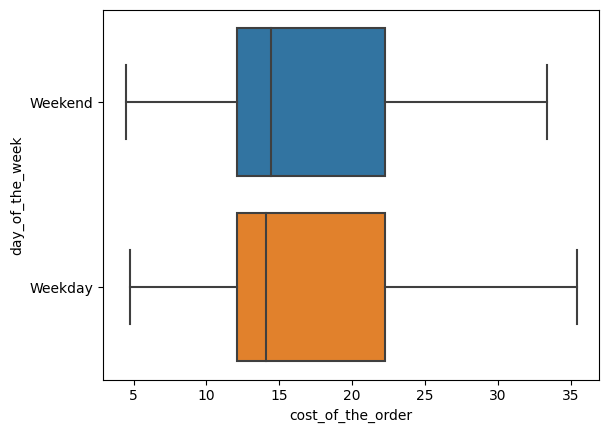

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order',y='day_of_the_week')



*  The cost of the order stays relatively same on weekends and weekdays.
*  The Average cost of order on both weekends and weekdays remains relatively same and below 15 dollars.



# Observations on Cost of order and food preparation and delivery time

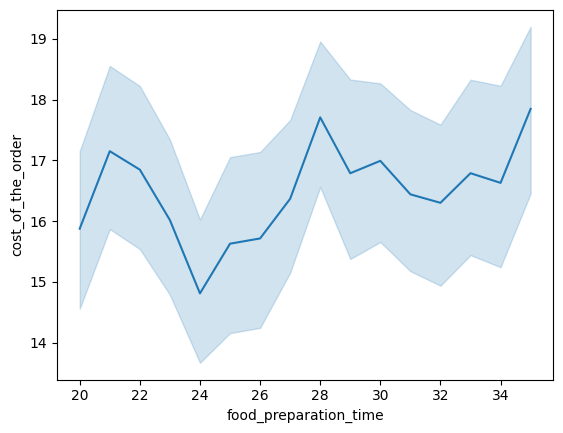

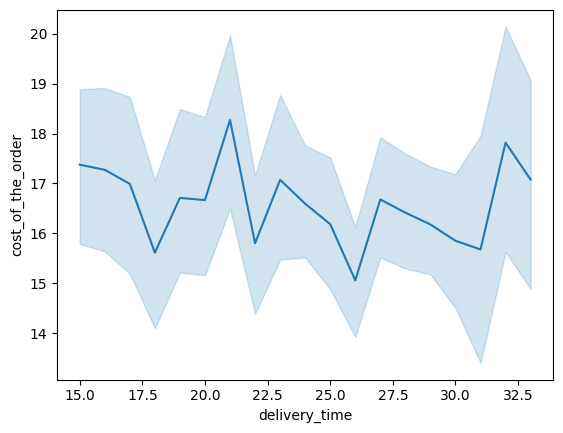

In [ ]:
sns.lineplot(data=df,x='food_preparation_time',y='cost_of_the_order')
plt.show()
sns.lineplot(data=df,x='delivery_time',y='cost_of_the_order')
plt.show()



*   The food preparation time in most cases increases with the cost of the order.
*   The delivery time does not have a relation withe the cost of order.



## Observations on Day of the week and food preparation and delivery time

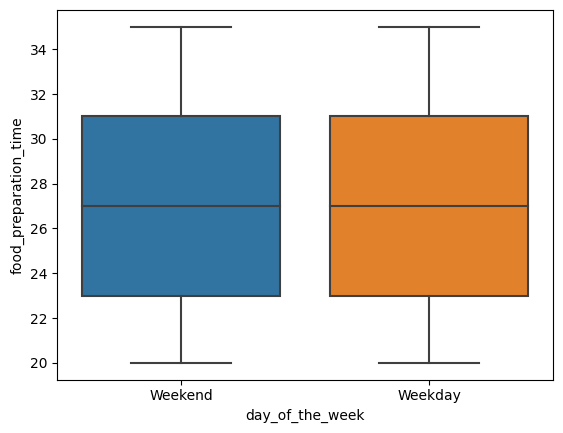

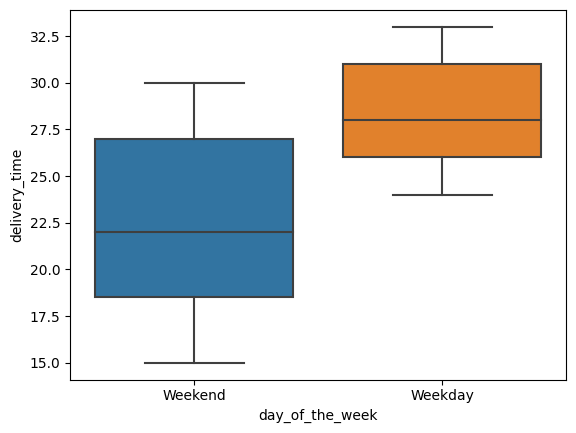

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()



*  The food preparation time is relatively same on weekends and weekdays.
*  The delivery time on the weekend is more than weekdays.



# Observation of rating and food preparation and delivery time.

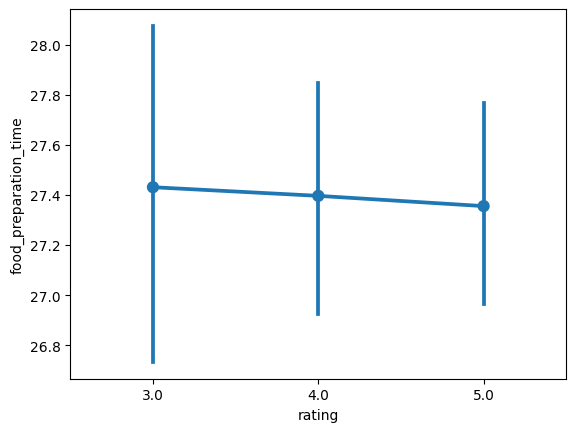

In [ ]:
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

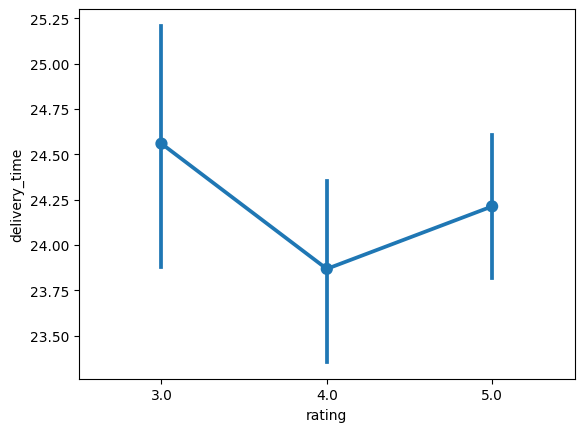

In [ ]:

sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()


*  On an average the food preparation time stays same for changing ratings.
*   The delivery time and the rating do not have a correlation.






# Name of the restaurant and revenue




In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64



*   Above is a list of top 14 restaurants in terms of revenue generated by them.




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
rated_res=df[df['rating'].notna()].copy()
rated_res

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3.0,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5.0,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19




1.  Above is a list of of all the restaurants which are rated.




In [ ]:
rated_res['rating']=rated_res['rating'].astype('int')

In [ ]:
df3=rated_res.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df3

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [ ]:
df4=df3[df3['rating']>50]['restaurant_name']
df4

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [ ]:
df_mean_4 =rated_res[rated_res['restaurant_name'].isin(df4)].copy()

In [ ]:
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

*   The restaurants fulfilling the criteria to get the promotional offer are :
1.   The Meatball Shop
2.   Blue Ribbon Fried Chicken
3.  Shake Shack
4.  Blue Ribbon Sushi








### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculating the revenue of each order
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df['Revenue']

0       7.6875
1       1.8120
2       1.8345
3       7.3000
4       1.7385
         ...  
1893    5.5775
1894    1.8270
1895    6.3050
1896    1.8270
1897    2.9175
Name: Revenue, Length: 1898, dtype: float64

In [ ]:
# Sum of all the revenues.
total_rev = df['Revenue'].sum()
total_rev

6166.303

#### Observations:

*   The total revenue of the company is 6166.3 dollars.




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# We first compute the total time by adding the foof preparation time and delivery time
df['total_time']=df['food_preparation_time'] + df['delivery_time']
df['total_time']

0       45
1       48
2       51
3       40
4       49
        ..
1893    48
1894    50
1895    55
1896    54
1897    52
Name: total_time, Length: 1898, dtype: int64

In [ ]:
# We filter the data having the total time more than 60 min
df60=df['total_time'].loc[df['total_time']>60]
df60

7       63
10      62
19      61
24      61
54      64
        ..
1869    61
1873    63
1875    65
1880    62
1889    63
Name: total_time, Length: 200, dtype: int64

In [ ]:
# Now we calculate the percentage using the total time and the filtered data
Percentage=(df60.shape[0]/df['total_time'].shape[0])*100
Percentage

10.537407797681771

#### Observations:

* Almost 10 percent of the orders take more than 60 minutes for delivery once the order is placed.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

<Axes: xlabel='delivery_time', ylabel='day_of_the_week'>

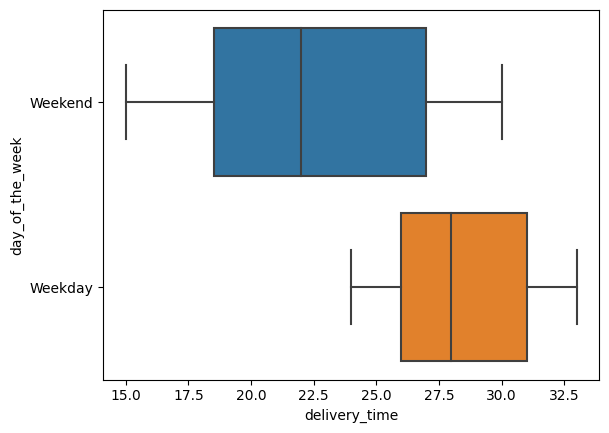

In [ ]:
#The boxplot will show the mean of both weekdays and weekends, helping to analyze thedifference.
sns.boxplot(data=df,x='delivery_time',y='day_of_the_week')

In [ ]:
# We first compute the mean of only weekdays.
df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(),


(28.340036563071298,)

In [ ]:
# Now we compute the mean of only weekends.
df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

22.4700222057735

#### Observations:

*   The average delivery time on the weekend is 22.47 minutes which is less than the average delivery time on weekdays 28.34 mnutes.





### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  We have analyzed the dataset of 1898 unique food delivery orders, which includes data of 1200 customers, 178 restaurants and 14 different cuisine type. The data also includes the food preparation time, delivery time and day of  each order. From this we can conclude that:

1.   The demand for food delivery is high on weekends as compared to weekdays. We need to further investigate the low demand on weekdays.
2. The delivery time on weekend is also less than that of weekday.
3. The food preparation time stays almost consistent for both weekdays and weekends.
4. American cuisine is the most popular cuisisne on both weekdays and weekend, followed by Japanese and Italian.
5. Many rows in the rating column are missing, but from the available data we can conclude most of the orders have a high rating of 5.
6. Almost 70 percent of the of the orders are below 20 dollars.
7. The company has many loyal customers, with many customers using the app frequently.
8. Almost 90 percent of the orders take less than 60 minutes for delivery, since the order was placed.



### Recommendations:



1.   American Cuisine is the most popular cuisine in the app. Japanese and Italian show potential.
2.   The demand is high on the weekend, delivery availability must be ensured during this time.
3. The delivery time on weekdays is high, we need to investigate further if the reduction in delivery time will increase the demand on weekday.
4. We need to investigate the data further to understand if running promotional offers on weekday will ncrease the demand on weekdays.
5. A better part of the rating data is missing, we need to find different ways of getting customers to rate the service, such as reduction in time taken to provide ratings, promotional offers for customers who provide ratings in app etc.
5. Many customers are frequently using the app and have rated the services on the higher side, we need to keep up this momentum.
6. The total time taken for food preparation and delivery in most cases is less than 60 minutes, making it the perfect service for busy professionals and students. We need to ensure that this time is maintained.



---